# Task1/Point4

## 4. Using the project dataset data/CARS.csv create: Use the plotly library

In [25]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("data/CARS.csv")

makeColumn = df['Make']
modelColumn = df['Model']
typeColumn = df['Type']
originColumn = df['Origin']
driveTrainColumn = df['DriveTrain']

df

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170,22,29,2822,101,180


### 4.1 Distribution of each variable:

#### 4.1.1 For categorical variables a bar graph. Category number of observations.

In [26]:
def createBarGraph(column, title, color):
    counts = column.value_counts().reset_index()
    counts.columns = ['Category', 'Quantity of observations']

    fig = px.bar(counts, x='Category', y='Quantity of observations', color_discrete_sequence=[color])
    fig.update_layout(title=title)
    fig.show()

# categorical columns
createBarGraph(makeColumn, 'Make', 'aliceblue')
createBarGraph(modelColumn, 'Model', 'antiquewhite')
createBarGraph(typeColumn, 'Type', 'aqua')
createBarGraph(originColumn, 'Origin', 'aquamarine')
createBarGraph(driveTrainColumn, 'DriveTrain', 'azure')

#### 4.1.2 For numerical variables create histograms. List models of cars that are further than 5 standards of deviation, and They would be considered outliers. Test if it is a distribution normal or not.

In [27]:
df["Invoice"] = df["Invoice"].replace(r'[\$,]', '', regex=True).astype(float)
df["MSRP"] = df["MSRP"].replace(r'[\$,]', '', regex=True).astype(float)

def createHistogram(column, title, color):
    fig = px.histogram(x=column, color_discrete_sequence=[color], title=title)
    fig.update_layout(xaxis_title="Category", yaxis_title="Quantity of observations")
    fig.show()

invoiceColumn = df["Invoice"]
msrpColumn = df["MSRP"]
engineSizeColumn = df["EngineSize"]
cylindersColumn = df["Cylinders"]
horsePowerColumn = df["Horsepower"]
mpgCityColumn = df["MPG_City"]
mpgHighwayColumn = df["MPG_Highway"]
weightColumn = df["Weight"]
wheelBaseColumn = df["Wheelbase"]
lengthColumn = df["Length"]
    
createHistogram(invoiceColumn, 'Invoice', 'aliceblue')
createHistogram(msrpColumn, 'MSRP', 'antiquewhite')
createHistogram(engineSizeColumn, 'Engine Size', 'aqua')
createHistogram(cylindersColumn, 'Cylinders', 'aquamarine')
createHistogram(horsePowerColumn, 'Horse Power', 'azure')
createHistogram(mpgCityColumn, 'MPG City', 'beige')
createHistogram(mpgHighwayColumn, 'MPG Highway', 'bisque')
createHistogram(weightColumn, 'Weight', 'black')
createHistogram(wheelBaseColumn, 'Wheel Base', 'blanchedalmond')
createHistogram(lengthColumn, 'Length', 'blanchedalmond')

In [28]:
columns = ["EngineSize","Cylinders","Horsepower","MPG_City","MPG_Highway","Weight","Wheelbase","Length"]

standardizedDf = (df[columns] - df[columns].mean()) / df[columns].std()

standardizedDf.query(
               "(EngineSize > 5.0 or EngineSize < -5.0)"
               "or (Cylinders > 5.0 or Cylinders < -5.0)"
               "or (Horsepower > 5.0 or Horsepower < -5.0)"
               "or (MPG_City > 5.0 or MPG_City < -5.0)"
               "or (MPG_Highway > 5.0 or MPG_Highway < -5.0)"
               "or (Weight > 5.0 or Weight < -5.0)"
               "or (Wheelbase > 5.0 or Wheelbase < -5.0)"
               "or (Length > 5.0 or Length < -5.0)"
)

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
150,-1.079501,-1.801485,-1.989051,7.624588,6.820271,-2.276669,-1.582592,-2.184299
373,-1.530522,-1.159819,-1.473989,7.433684,4.207577,-0.906414,-0.259174,-0.791347


In [29]:
from scipy.stats import shapiro

for column in columns:
    stat, pValue = shapiro(df[column])
    print(f'Column: {column},p value: {pValue}')
    alpha = 0.05
    if pValue > alpha: print(f"The column {column} is a normal distribution, because p > {alpha}\n")
    else: print(f"The column {column} is not a normal distribution\n") 

Column: EngineSize,p value: 1.2985194467549494e-09
The column EngineSize is not a normal distribution

Column: Cylinders,p value: 1.0
The column Cylinders is a normal distribution, because p > 0.05

Column: Horsepower,p value: 7.41013135682005e-11
The column Horsepower is not a normal distribution

Column: MPG_City,p value: 3.3896695924481945e-22
The column MPG_City is not a normal distribution

Column: MPG_Highway,p value: 2.776713137710913e-13
The column MPG_Highway is not a normal distribution

Column: Weight,p value: 1.4721143163203427e-09
The column Weight is not a normal distribution

Column: Wheelbase,p value: 7.587275469093445e-11
The column Wheelbase is not a normal distribution

Column: Length,p value: 0.011839248346416456
The column Length is not a normal distribution


### 4.2 Graph of the relationship of each variable with respect to MPG_City:

#### 4.2.1 Categorical variables you must create a boxplot. Explain how interpret the graph

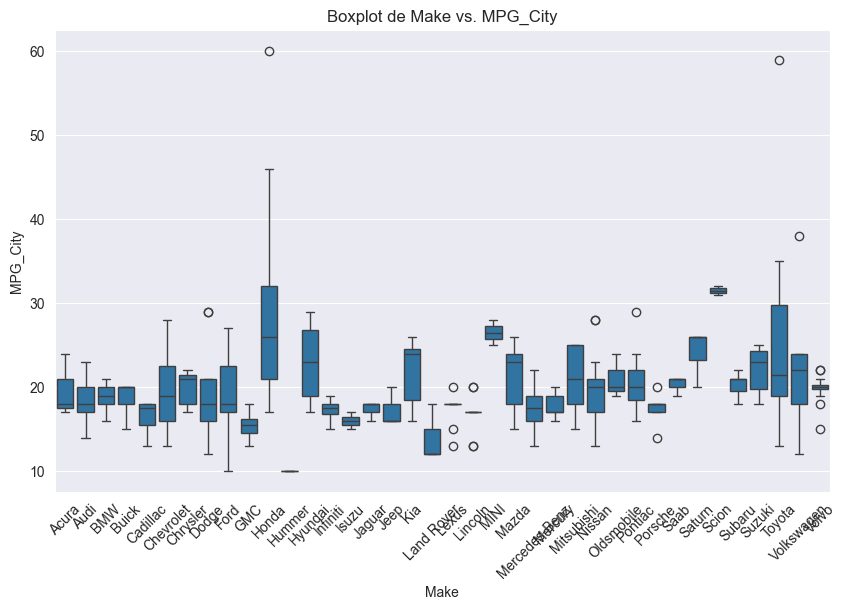

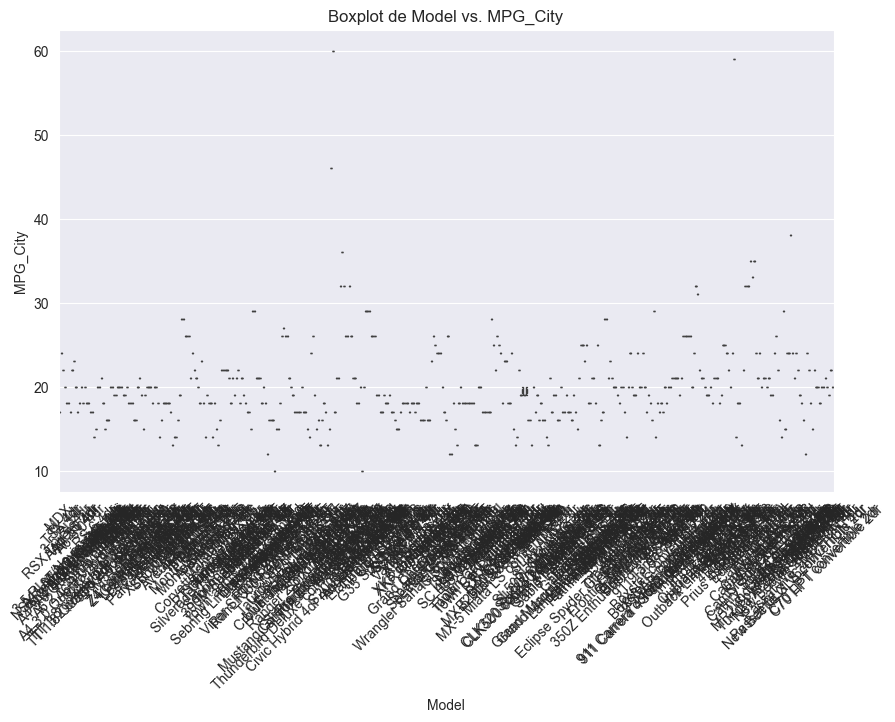

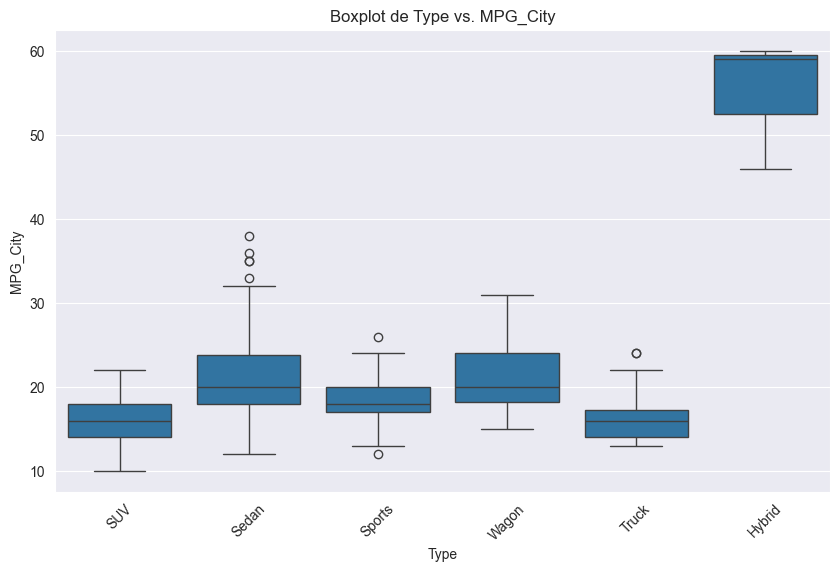

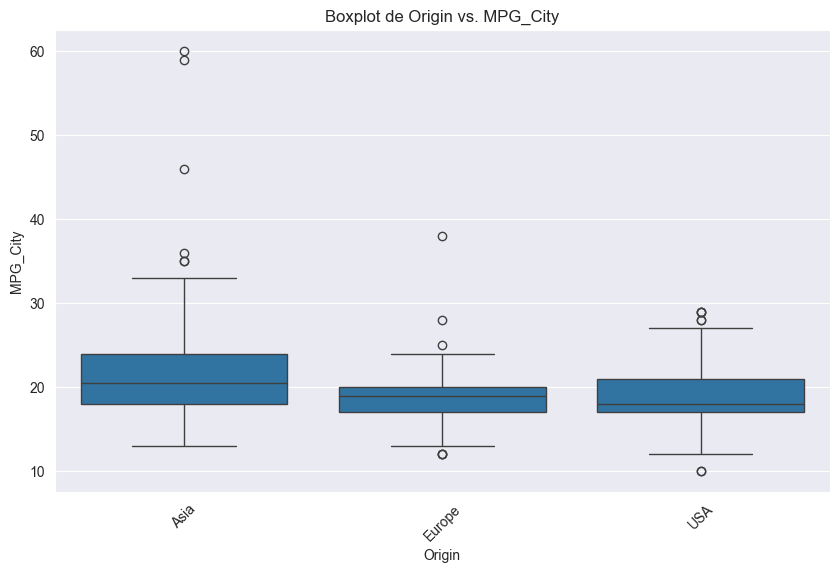

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

categoricalVariables = ["Make", "Model", "Type", "Origin"]

for var in categoricalVariables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=var, y="MPG_City")
    plt.title(f"Boxplot de {var} vs. MPG_City")
    plt.xlabel(var)
    plt.ylabel("MPG_City")
    plt.xticks(rotation=45)
    plt.show()

Each boxplot displays the distribution of MPG_City values for each category of the categorical variable on the x-axis.
The box in the plot represents the interquartile range (IQR), covering the central 50% of the data. The central line of the box represents the median (50% of the data), while the lower and upper edges of the box represent the first and third quartiles, respectively.
The "whiskers" (vertical lines extending from the box) show the variability outside the IQR. They may indicate the presence of outliers.
Points that lie outside the whiskers are potential outliers.
By observing the boxplots, you can visually compare the distribution of MPG_City across different categories of the categorical variable on the x-axis. This allows you to identify any variation or trend in fuel consumption based on the category.

#### 4.2.2 Numerical variables you are going to create a scatter plot. Explain how interpret the graph

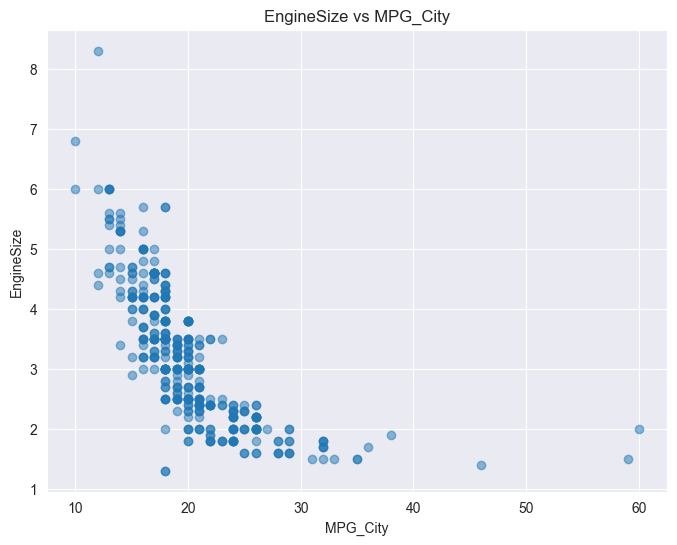

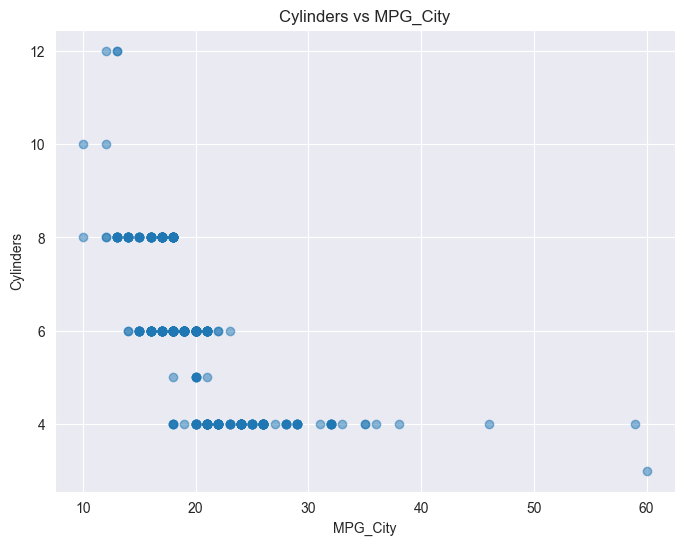

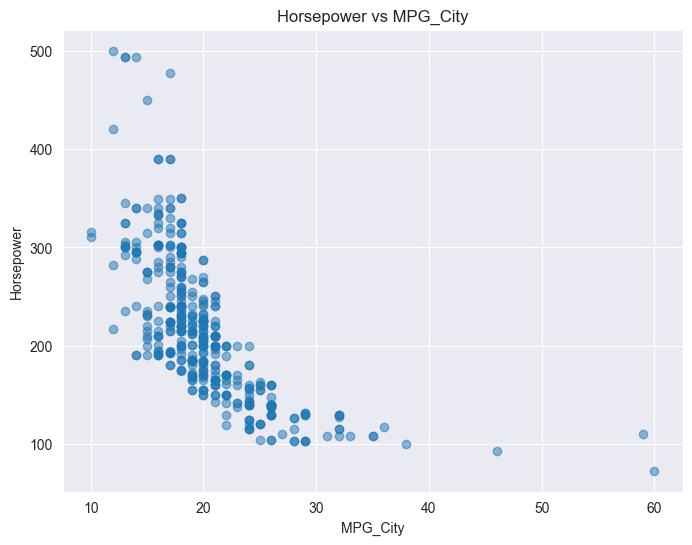

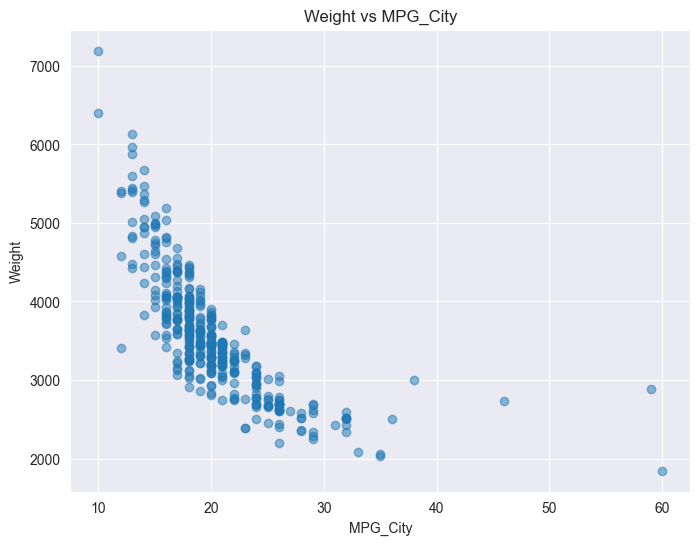

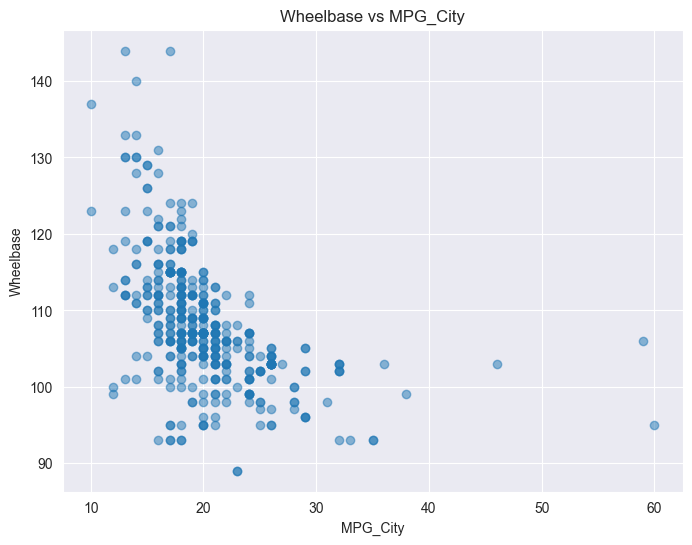

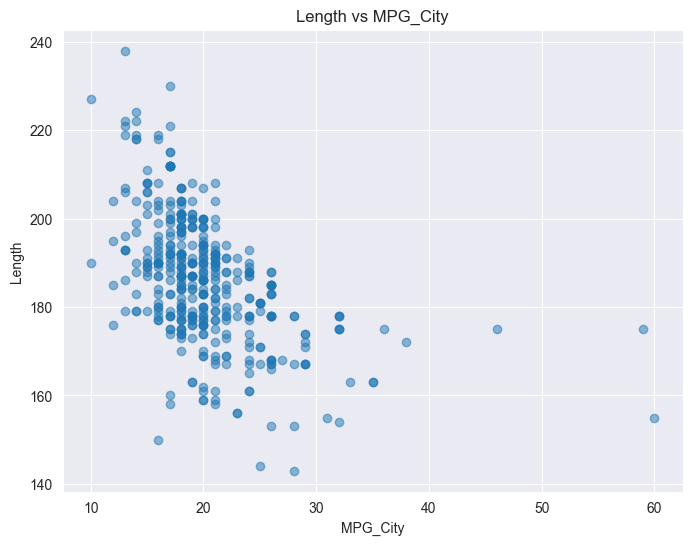

In [31]:
import matplotlib.pyplot as plt

numericalVariables = ["EngineSize", "Cylinders", "Horsepower", "Weight", "Wheelbase", "Length"]

for var in numericalVariables:
    plt.figure(figsize=(8, 6))
    plt.scatter(df["MPG_City"], df[var], alpha=0.5)
    plt.xlabel("MPG_City")
    plt.ylabel(var)
    plt.title(f"{var} vs MPG_City")
    plt.grid(True)
    plt.show()

These plots display the relationship between MPG_City and each numerical variable (EngineSize, Cylinders, Horsepower, Weight, Wheelbase, Length). Each point represents a car model, showing its MPG_City value on the x-axis and the respective numerical variable on the y-axis. Patterns in the plots indicate potential correlations between MPG_City and the variables, with linear patterns suggesting linear correlations and scattered points indicating weaker or non-linear relationships. Outliers in the plots may highlight anomalies in the data.

### 4.3 Matriz de correlación.

#### 4.3.1 Create the correlation matrix, which are the most important variables important to explain the variability of MPG_City. Explain why what the coefficient is negative or positive.

In [32]:
correlation_data = pd.DataFrame(df[["MSRP","Invoice","EngineSize","Horsepower","Cylinders","MPG_Highway","MPG_City"]])
correlation_data.corr()

,MSRP,Invoice,EngineSize,Horsepower,Cylinders,MPG_Highway,MPG_City
MSRP,1.000000,0.999132,0.571753,0.826945,0.649742,-0.439622,-0.475020
Invoice,0.999132,1.000000,0.564498,0.823746,0.645226,-0.434585,-0.470442
EngineSize,0.571753,0.564498,1.000000,0.787435,0.908002,-0.717302,-0.709471
Horsepower,0.826945,0.823746,0.787435,1.000000,0.810341,-0.647195,-0.676699
Cylinders,0.649742,0.645226,0.908002,0.810341,1.000000,-0.676100,-0.684402
MPG_Highway,-0.439622,-0.434585,-0.717302,-0.647195,-0.676100,1.000000,0.941021
MPG_City,-0.475020,-0.470442,-0.709471,-0.676699,-0.684402,0.941021,1.000000


When the correlation coefficient is close to zero, it suggests a weak or negligible relationship between the variables. In the range between -0.5 and 0.5, the correlation indicates a moderate connection without strong dependence. A positive coefficient between 0.5 and 1 implies that as one variable increases, the other tends to increase as well, indicating a significant relationship where changes in one variable coincide with changes in the other in the same direction.

#### 4.3.2 Create dummy variables for all categorical variables and generate the correlation matrix again. What is the value of categorical variable with the highest correlation?

In [33]:
import numpy as np

categoricalVariables = pd.DataFrame(df[["Make","Type","Origin","DriveTrain"]])
dummy_variables = pd.get_dummies(categoricalVariables[["Make","Type","Origin","DriveTrain"]])
correlation = dummy_variables.corr()

np.fill_diagonal(correlation.values, np.nan)

highestCorrelation = correlation.abs().stack().max()
print(f"El valor de la correlación más alta es: {highestCorrelation}")

correlation

El valor de la correlación más alta es: 0.6221015987386009


,Make_Acura,Make_Audi,Make_BMW,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,Make_Ford,Make_GMC,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
Make_Acura,NaN,-0.027792,-0.028549,-0.018898,-0.017796,-0.033459,-0.024574,-0.022822,-0.030729,-0.017796,...,0.027029,0.011490,-0.031428,-0.035402,0.168563,-0.081886,-0.093264,-0.022631,0.048108,-0.033684
Make_Audi,-0.027792,NaN,-0.047720,-0.031589,-0.029746,-0.055927,-0.041076,-0.038147,-0.051363,-0.029746,...,0.031875,0.065012,-0.052533,0.029691,-0.164878,0.339401,-0.155891,0.218596,-0.068914,-0.126765
Make_BMW,-0.028549,-0.047720,NaN,-0.032449,-0.030557,-0.057451,-0.042194,-0.039186,-0.052762,-0.030557,...,0.017199,0.059463,-0.053963,-0.017425,-0.169368,0.348644,-0.160137,0.018889,-0.234187,0.249780
Make_Buick,-0.018898,-0.031589,-0.032449,NaN,-0.020227,-0.038030,-0.027931,-0.025940,-0.034926,-0.020227,...,0.049818,-0.052698,-0.035721,-0.040238,-0.112114,-0.093072,0.202632,-0.037048,0.105939,-0.086198
Make_Cadillac,-0.017796,-0.029746,-0.030557,-0.020227,NaN,-0.035812,-0.026302,-0.024427,-0.032889,-0.019048,...,-0.031766,0.004557,0.041347,-0.037891,-0.105576,-0.087644,0.190816,-0.030222,0.026806,-0.002214
Make_Chevrolet,-0.033459,-0.055927,-0.057451,-0.038030,-0.035812,NaN,-0.049452,-0.045926,-0.061837,-0.035812,...,-0.030138,-0.032934,0.145619,-0.033598,-0.198498,-0.164783,0.358760,-0.018804,0.072057,-0.064642
Make_Chrysler,-0.024574,-0.041076,-0.042194,-0.027931,-0.026302,-0.049452,NaN,-0.033730,-0.045416,-0.026302,...,0.099547,-0.028622,-0.046450,-0.002558,-0.145786,-0.121024,0.263491,-0.099723,0.129273,-0.053937
Make_Dodge,-0.022822,-0.038147,-0.039186,-0.025940,-0.024427,-0.045926,-0.033730,NaN,-0.042178,-0.024427,...,0.001175,-0.020880,0.134392,-0.048592,-0.135392,-0.112396,0.244705,-0.026328,0.003696,0.020528
Make_Ford,-0.030729,-0.051363,-0.052762,-0.034926,-0.032889,-0.061837,-0.045416,-0.042178,NaN,-0.032889,...,-0.065482,0.011937,0.077024,0.015740,-0.182298,-0.151335,0.329481,-0.023808,-0.003007,0.025816
Make_GMC,-0.017796,-0.029746,-0.030557,-0.020227,-0.019048,-0.035812,-0.026302,-0.024427,-0.032889,NaN,...,-0.137982,-0.049625,0.266304,-0.037891,-0.105576,-0.087644,0.190816,0.053771,-0.076867,0.037265


#### 4.3.3 Create the correlation matrix again by removing all the car models that were classified as an outlier. (Can use .query(‘Model in["MDX","TSX 4dr"]’ ). There is some variation in correlation.

In [34]:
filteredDf = df.query('Model not in ["MDX","TSX 4dr"]')

numericalColumns = ["MSRP", "Invoice", "EngineSize", "Horsepower", "Cylinders", "MPG_Highway", "MPG_City"]
correlationData = filteredDf[numericalColumns]

correlationMatrix = correlationData.corr()

correlationMatrix

,MSRP,Invoice,EngineSize,Horsepower,Cylinders,MPG_Highway,MPG_City
MSRP,1.000000,0.999132,0.571601,0.827079,0.650010,-0.439396,-0.474809
Invoice,0.999132,1.000000,0.564341,0.823910,0.645471,-0.434388,-0.470255
EngineSize,0.571601,0.564341,1.000000,0.787648,0.908032,-0.717233,-0.709363
Horsepower,0.827079,0.823910,0.787648,1.000000,0.811336,-0.646766,-0.676360
Cylinders,0.650010,0.645471,0.908032,0.811336,1.000000,-0.676442,-0.684713
MPG_Highway,-0.439396,-0.434388,-0.717233,-0.646766,-0.676442,1.000000,0.940955
MPG_City,-0.474809,-0.470255,-0.709363,-0.676360,-0.684713,0.940955,1.000000
